# Figure S5F: ERV3-16A3-LTR expression and BAP1 mutation status

In [11]:
library(DESeq2)
library(dplyr)
library(glue)
library(ggplot2)
library(ggsignif)
library(car)
setwd('data/inhouse_wu_long_yu')

## Construct expression counts matrix

Sample IDs we are using in the analysis

In [12]:
samples_one = read.table('scte/JAV101/model/ICBarm_BAP1_status_pLOF_WT_230.tsv', sep = '\t', check.names = FALSE, header = TRUE)
samples_two = read.table('scte/JAV101/model/TKIarm_BAP1_status_pLOF_WT_251.tsv', sep = '\t', check.names = FALSE, header = TRUE)
samples = dplyr::bind_rows(samples_one, samples_two)

samples = samples$sample_id
length(samples)

[1] 481

Rows: TEs
Columns: Sample IDs

In [13]:
counts = read.table('scte/JAV101/counts/scte_counts_578.txt', sep = '\t', check.names = F, header = TRUE)
row.names(counts) = counts[,1]
counts = counts[,-1]
head(counts)
dim(counts)

,10011001_6203185783,10011004_6204067375,10011006_6204067377,10011007_6204067220,10011008_6204067223,10011009_6204067219,10011010_6204820854,10011014_6204067221,10011017_6204067222,10011018_6204174130,⋯,12551003_6204075425,12551004_6204075423,12551005_6204075420,12551007_6205257638,12551008_6205257636,12551009_6205257635,12551010_6204075424,12551012_6205640301,12551014_6205640297,12551015_6205640300
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
(A)n,6089,7423,7481,8362,7605,7619,8143,4038,7611,7660,⋯,7290,8912,4263,5689,4118,7480,8112,7530,7040,5579
(AAATG)n,62,64,53,58,65,192,47,69,89,63,⋯,63,91,23,86,69,51,78,44,57,40
(AACTG)n,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
(AAGTG)n,0,0,1,0,0,0,0,3,1,2,⋯,0,0,0,0,0,1,0,0,1,2
(AATAG)n,25,16,19,26,22,29,6,18,18,25,⋯,30,39,7,33,27,21,19,13,47,4
(AATTG)n,3,2,1,4,0,4,0,0,3,2,⋯,2,1,0,1,1,0,0,1,4,1


[1] 59112   578

Subset to samples in the analysis and **TEs** only.

In [14]:
te_counts = read.table('scte/preprocessing/unfiltered_combined_scte.txt', sep = '\t', header = TRUE, check.names = FALSE)
tes = colnames(te_counts)[-1]
tes = gsub("\\.", "-", tes)
tes = intersect(row.names(counts), tes)
tes_counts = counts[tes, samples]

## Format metadata for model

In [15]:
# BAP1 pLOF status, purity, stage
bap1_status_one = read.table('scte/JAV101/model/ICBarm_BAP1_status_pLOF_WT_230.tsv', sep = '\t', check.names = FALSE, header = TRUE)
bap1_status_two = read.table('scte/JAV101/model/TKIarm_BAP1_status_pLOF_WT_251.tsv', sep = '\t', check.names = FALSE, header = TRUE)
bap1_status = dplyr::bind_rows(bap1_status_one, bap1_status_two)

purity_one = read.table('scte/JAV101/model/ICBarm_facetsPurity_230.tsv', sep = '\t', check.names = FALSE, header = TRUE)
purity_two = read.table('scte/JAV101/model/TKIarm_facetsPurity_251.tsv', sep = '\t', check.names = FALSE, header = TRUE)
purity = dplyr::bind_rows(purity_one, purity_two)

clinical_one = read.table('scte/JAV101/model/ICB_clinicaldata_230.txt', sep = '\t', check.names = FALSE, header = TRUE)
clinical_two = read.table('scte/JAV101/model/TKI_clinicaldata_251.txt', sep = '\t', check.names = FALSE, header = TRUE)
clinical = dplyr::bind_rows(clinical_one, clinical_two)


In [16]:
metadata = dplyr::inner_join(bap1_status, purity, by = 'sample_id')
metadata = dplyr::inner_join(metadata,clinical, by = 'sample_id')
row.names(metadata) = metadata$sample_id
metadata$sample_id = NULL
metadata$pLOF = factor(metadata$pLOF)
head(metadata)

,pLOF,facets_purity,Arm,USUBJID,RNA_ID,ORR,Tumor_Shrinkage,PFS,PFS_CNSR,OS,OS_CNSR,MSKCC,Tumor_Location,Metastasis_Location,Sex,Age,Race,PDL1
,<fct>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
11711012_6504476708,1,0.514,Avelumab + Axitinib,11711012,11711012_6504476708,CR,-68.4,19.383984,1,20.20534,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,60,WHITE,Y
11691003_6600772211,1,0.341,Avelumab + Axitinib,11691003,11691003_6600772211,PR,-53.3,13.831622,0,13.83162,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,60,ASIAN,N
11621018_6204951997,1,0.253,Avelumab + Axitinib,11621018,11621018_6204951997,PR,-70.8,9.921971,1,17.97125,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,63,WHITE,Y
11621003_6204332293,1,0.208,Avelumab + Axitinib,11621003,11621003_6204332293,PR,-69.9,20.796715,0,21.35524,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,63,WHITE,Y
11531005_6600878402,1,0.544,Avelumab + Axitinib,11531005,11531005_6600878402,PD,17.4,1.412731,1,17.54415,0,POOR,PRIMARY,KIDNEY,Female,62,ASIAN,N
11531002_6600679182,1,0.349,Avelumab + Axitinib,11531002,11531002_6600679182,SD,-26.8,9.823409,0,11.07187,0,INTERMEDIATE,METASTATIC,LUNG,Male,70,ASIAN,Y


## Normalize expression data using DESeq

In [18]:
dds <- DESeqDataSetFromMatrix(countData = tes_counts, colData = metadata, design = ~ facets_purity + Age + Sex + Tumor_Location + MSKCC + PDL1 + pLOF)
dds <- DESeq(dds)

# Get normalized count matrix
dds <- DESeqDataSetFromMatrix(countData = tes_counts, colData = metadata, design = ~ pLOF)
dds <- DESeq(dds)
vsd <- varianceStabilizingTransformation(dds, blind=TRUE)  # 'blind=FALSE' means that the transformation will take the design into account
vsd_counts <- assay(vsd)

# create one DF that has both ERV3-16A3_LTR counts and metadata
normalized = data.frame(check.names = FALSE,
    'ERV3-16A3_LTR' = vsd_counts['ERV3-16A3_LTR',])
normalized$ids = row.names(normalized)
metadata$ids = row.names(metadata)
base_model_df = dplyr::inner_join(metadata, normalized, by = 'ids')
base_model_df$pLOF = factor(base_model_df$pLOF, levels = c(0,1))
head(base_model_df)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

m

,pLOF,facets_purity,Arm,USUBJID,RNA_ID,ORR,Tumor_Shrinkage,PFS,PFS_CNSR,OS,OS_CNSR,MSKCC,Tumor_Location,Metastasis_Location,Sex,Age,Race,PDL1,ids,ERV3-16A3_LTR
,<fct>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1,0.514,Avelumab + Axitinib,11711012,11711012_6504476708,CR,-68.4,19.383984,1,20.20534,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,60,WHITE,Y,11711012_6504476708,7.787822
2,1,0.341,Avelumab + Axitinib,11691003,11691003_6600772211,PR,-53.3,13.831622,0,13.83162,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,60,ASIAN,N,11691003_6600772211,7.058954
3,1,0.253,Avelumab + Axitinib,11621018,11621018_6204951997,PR,-70.8,9.921971,1,17.97125,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,63,WHITE,Y,11621018_6204951997,7.412311
4,1,0.208,Avelumab + Axitinib,11621003,11621003_6204332293,PR,-69.9,20.796715,0,21.35524,0,INTERMEDIATE,PRIMARY,KIDNEY,Male,63,WHITE,Y,11621003_6204332293,7.317680
5,1,0.544,Avelumab + Axitinib,11531005,11531005_6600878402,PD,17.4,1.412731,1,17.54415,0,POOR,PRIMARY,KIDNEY,Female,62,ASIAN,N,11531005_6600878402,7.992348
6,1,0.349,Avelumab + Axitinib,11531002,11531002_6600679182,SD,-26.8,9.823409,0,11.07187,0,INTERMEDIATE,METASTATIC,LUNG,Male,70,ASIAN,Y,11531002_6600679182,7.606032


## Evaluate relationship between ERV expression and BAP1 mutation status and plot

In [19]:
fit = lm(base_model_df[, 'ERV3-16A3_LTR'] ~ pLOF + scale(facets_purity) + scale(Age) + Sex + Tumor_Location, data = base_model_df)
summary(fit)


Call:
lm(formula = base_model_df[, "ERV3-16A3_LTR"] ~ pLOF + scale(facets_purity) + 
    scale(Age) + Sex + Tumor_Location, data = base_model_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67947 -0.15062  0.01017  0.14539  0.61963 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.574603   0.027180 278.681  < 2e-16 ***
pLOF1                  0.009772   0.031721   0.308  0.75817    
scale(facets_purity)   0.038615   0.010548   3.661  0.00028 ***
scale(Age)             0.017184   0.010575   1.625  0.10482    
SexMale               -0.050828   0.024818  -2.048  0.04111 *  
Tumor_LocationPRIMARY -0.101619   0.022424  -4.532 7.41e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2307 on 475 degrees of freedom
Multiple R-squared:  0.08352,	Adjusted R-squared:  0.07388 
F-statistic: 8.658 on 5 and 475 DF,  p-value: 7.233e-08


In [20]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Estimate", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


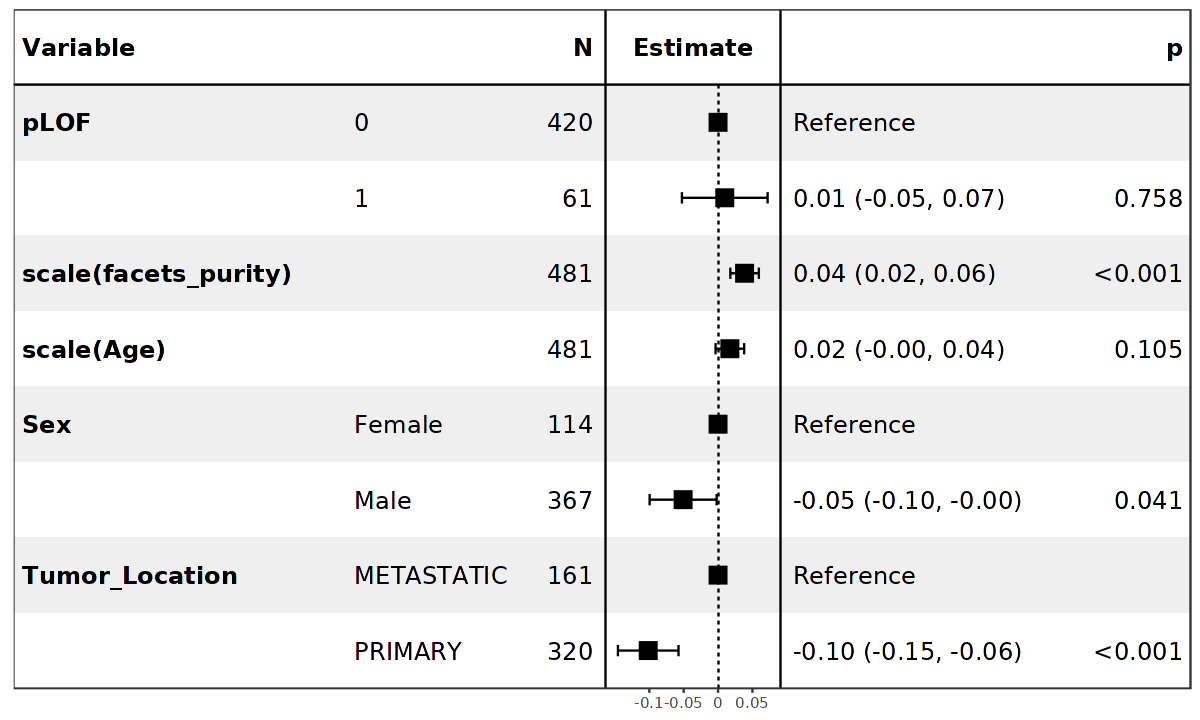

In [21]:
options(repr.plot.width = 10, repr.plot.height = 6)
library(forestmodel)
bap1_erv_expression = forest_model(fit, exponentiate = FALSE, panels = panels)
bap1_erv_expression

# Figure 5C: ERV3_16A3_LTR and PFS, IO arm

In [23]:
library(survival)
library(survminer)
library(forestmodel)

Subset to samples in IO arm and fit CoxPH model. 

In [25]:
base_model_df$ERV3_16A3_LTR = scale(base_model_df[,'ERV3-16A3_LTR'])
io_arm_model_df = base_model_df %>% filter(Arm == 'Avelumab + Axitinib')

cox_model <- coxph(Surv(PFS, PFS_CNSR) ~ ERV3_16A3_LTR + pLOF + scale(facets_purity) + scale(Age) + Sex + Tumor_Location + MSKCC + PDL1, data = io_arm_model_df)
summary(cox_model)

Call:
coxph(formula = Surv(PFS, PFS_CNSR) ~ ERV3_16A3_LTR + pLOF + 
    scale(facets_purity) + scale(Age) + Sex + Tumor_Location + 
    MSKCC + PDL1, data = io_arm_model_df)

  n= 230, number of events= 117 

                          coef exp(coef) se(coef)      z Pr(>|z|)    
ERV3_16A3_LTR          0.06964   1.07212  0.09580  0.727 0.467277    
pLOF1                  0.17212   1.18782  0.25558  0.673 0.500676    
scale(facets_purity)   0.03201   1.03253  0.08517  0.376 0.707002    
scale(Age)            -0.18462   0.83142  0.09407 -1.963 0.049682 *  
SexMale               -0.33256   0.71708  0.20584 -1.616 0.106167    
Tumor_LocationPRIMARY -0.18258   0.83312  0.22735 -0.803 0.421948    
MSKCCINTERMEDIATE      0.69471   2.00312  0.29254  2.375 0.017563 *  
MSKCCPOOR              1.28310   3.60781  0.37454  3.426 0.000613 ***
PDL1Y                 -0.28562   0.75155  0.21030 -1.358 0.174432    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                      e

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


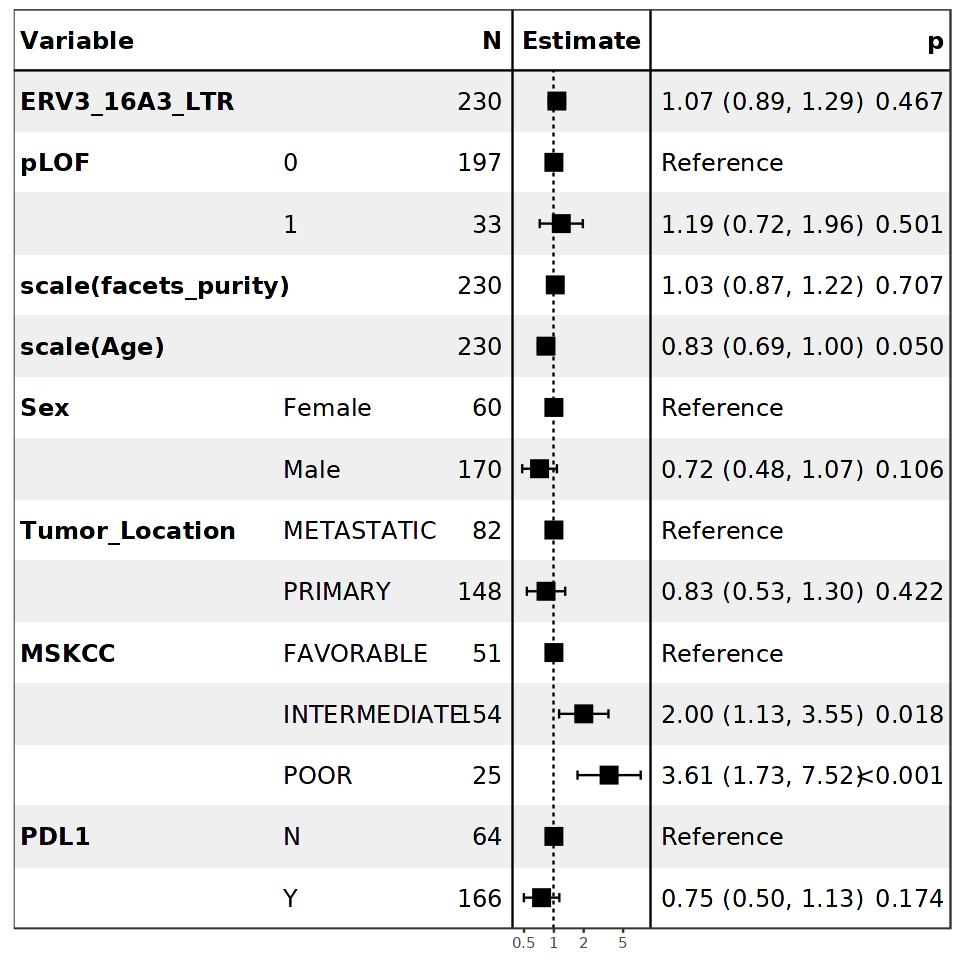

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)
bap1_erv_survival = forest_model(cox_model, panels = panels)
bap1_erv_survival

# Figure S5E: ERV3_16A3_LTR and PFS, TKI arm

Subset to samples from TKI arm and fit CoxPH. 

In [27]:
tki_arm_model_df = base_model_df %>% filter(Arm != 'Avelumab + Axitinib')

cox_model <- coxph(Surv(PFS, PFS_CNSR) ~ ERV3_16A3_LTR + pLOF + scale(facets_purity) + scale(Age) + Sex + Tumor_Location + MSKCC + PDL1, data = tki_arm_model_df)
summary(cox_model)

Call:
coxph(formula = Surv(PFS, PFS_CNSR) ~ ERV3_16A3_LTR + pLOF + 
    scale(facets_purity) + scale(Age) + Sex + Tumor_Location + 
    MSKCC + PDL1, data = tki_arm_model_df)

  n= 251, number of events= 152 

                          coef exp(coef) se(coef)      z Pr(>|z|)    
ERV3_16A3_LTR         -0.07199   0.93054  0.09423 -0.764  0.44488    
pLOF1                  0.59935   1.82094  0.25568  2.344  0.01907 *  
scale(facets_purity)  -0.03072   0.96975  0.08772 -0.350  0.72619    
scale(Age)            -0.21218   0.80882  0.08112 -2.615  0.00891 ** 
SexMale                0.29849   1.34782  0.20883  1.429  0.15290    
Tumor_LocationPRIMARY  0.07071   1.07327  0.20423  0.346  0.72918    
MSKCCINTERMEDIATE      0.32456   1.38343  0.23107  1.405  0.16013    
MSKCCPOOR              1.35047   3.85922  0.32314  4.179 2.92e-05 ***
PDL1Y                 -0.01560   0.98453  0.19497 -0.080  0.93625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                      

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


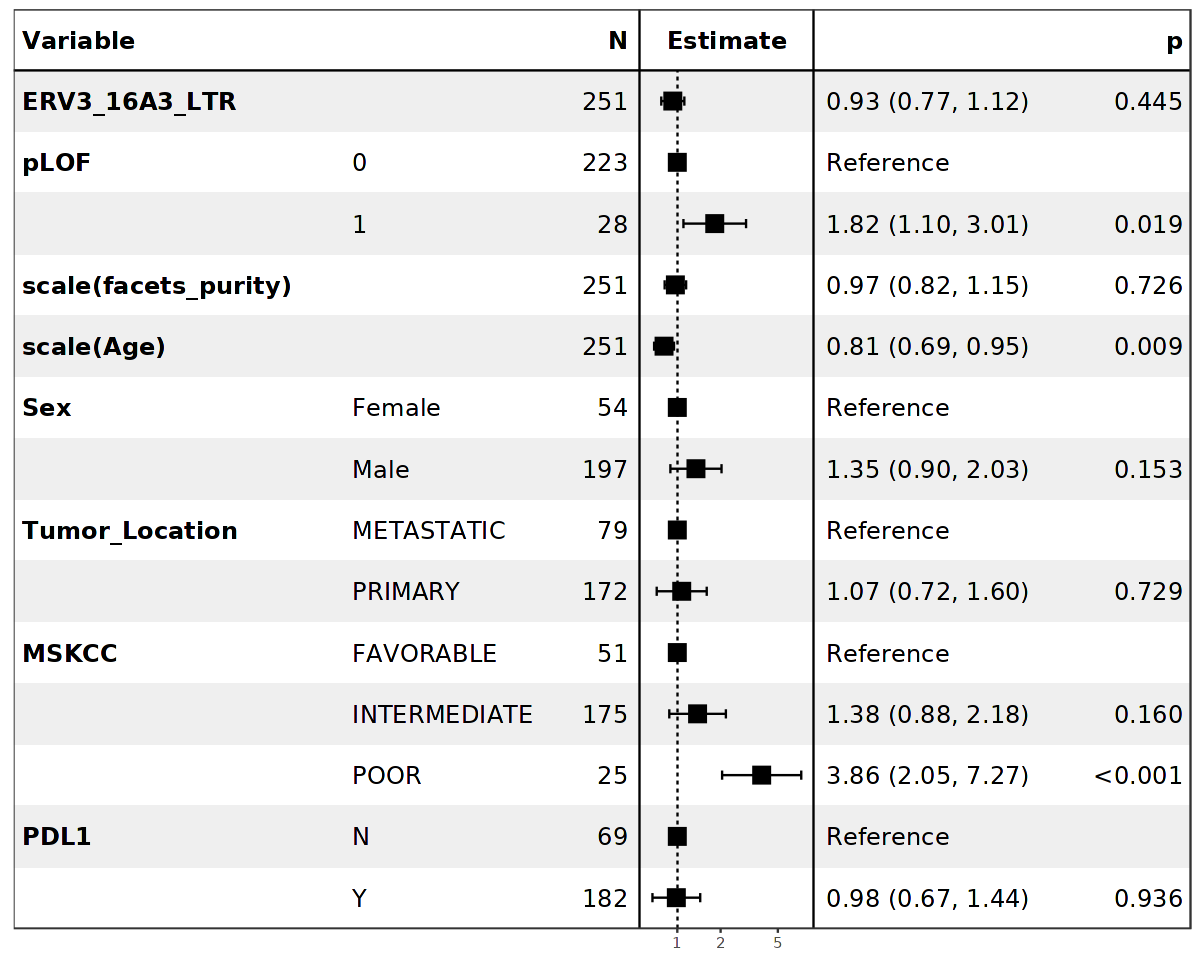

In [28]:
options(repr.plot.width = 10, repr.plot.height = 8)
bap1_erv_survival = forest_model(cox_model, panels = panels)
bap1_erv_survival